## Land area by number of involved conflicts as a function of Country

Group Members: Jenna Jordan, Dennis Piehl, Gianni Pezzarossi, Xue Lu, and Hsin-Yuan Wang

Group Name: Allied Against An Anonymous Axis (aka 5A)

Github Repo: https://github.com/jenna-jordan/IS590DV-FinalProject

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import gridspec

In [3]:
cshapes = pd.read_csv("Data/CShapes/country_shapes.csv")

In [4]:
ucdp = pd.read_csv("Data/UCDP-PRIO_ArmedConflict/participants_gw.csv")

We start by grouping the dataset by the gw_id which is a number used to identify a country (Gleditsch & Ward number). from there we count the number of unique conflict id's which are assigned to each unique conflict. From there the countries are sorted by the counts is ascending order.

In [5]:
sorted_conflict_counts = ucdp.groupby("gw_id")[["conflict_id"]].count().sort_values(by=['conflict_id'])

We then truncate the data into the top 20 and bottom 20 and sort each truncation is descending order, then rename the column to reflect that it is infact a count of conflicts and not a conflict id

In [79]:
top = sorted_conflict_counts.tail(20).sort_values(by=['conflict_id'], ascending=False)
bottom = sorted_conflict_counts.head(20).sort_values(by=['conflict_id'], ascending=False)
top.rename(columns={"conflict_id":"number_of_conflicts"},inplace=True)
bottom.rename(columns={"conflict_id":"number_of_conflicts"},inplace=True)
print(top)
print(bottom)

       number_of_conflicts
gw_id                     
775                    278
750                    201
530                    148
200                    118
840                    116
2                      116
220                    112
770                     94
666                     85
365                     81
645                     75
483                     73
630                     67
700                     66
640                     65
625                     59
235                     58
500                     57
100                     57
850                     55
       number_of_conflicts
gw_id                     
41                       3
150                      3
145                      3
95                       2
581                      2
42                       2
570                      1
55                       1
571                      1
352                      1
130                      1
703                      1
740                      1
9

In [80]:
for key,item in top.iterrows():
    print(cshapes[cshapes["gw_code"] == key][["country_name","area"]])

    country_name           area
148      Myanmar  670372.095395
    country_name          area
222        India  3.166803e+06
224        India  3.060681e+06
    country_name          area
56      Ethiopia  1.134773e+06
190     Ethiopia  1.256379e+06
      country_name           area
38  United Kingdom  243845.075909
    country_name           area
144  Philippines  294201.601138
      country_name          area
233  United States  9.468306e+06
    country_name           area
104       France  547871.255355
    country_name          area
135     Pakistan  8.794929e+05
199     Pakistan  1.017998e+06
223     Pakistan  9.361354e+05
    country_name          area
60        Israel  20783.964426
217       Israel  28159.600543
218       Israel  88932.215123
    country_name          area
64        Russia  1.682720e+07
188         USSR  2.200891e+07
247         USSR  2.180159e+07
248         USSR  2.176792e+07
249         USSR  2.112122e+07
250         USSR  2.087609e+07
251         USSR  2.073

In [81]:
for key,item in bottom.iterrows():
    print(cshapes[cshapes["gw_code"] == key][["country_name","area"]])

   country_name          area
23        Haiti  27315.459142
   country_name           area
11     Paraguay  400653.400582
  country_name          area
7      Bolivia  1.092697e+06
   country_name          area
33       Panama  74612.567562
    country_name         area
158      Comoros  1726.735969
          country_name          area
22  Dominican Republic  48625.699063
    country_name          area
159      Lesotho  30621.428734
   country_name        area
19      Grenada  348.318552
    country_name           area
153     Botswana  581127.216322
   country_name         area
89       Cyprus  9157.708605
   country_name           area
10      Ecuador  257026.690766
    country_name           area
133   Kyrgyzstan  199732.539747
    country_name           area
141        Japan  371862.299662
   country_name          area
28   Costa Rica  51402.625393
  country_name           area
1     Suriname  145952.274029
    country_name           area
168        Gabon  262447.341739
  country_na

It is then time to merge the conflict counts with teh cshapes dataset to get the associated area all in one table.

In [82]:
top_full = top.merge(cshapes, left_on="gw_id", right_on="gw_code")
bottom_full = bottom.merge(cshapes, left_on="gw_id", right_on="gw_code")
top_full

,number_of_conflicts,area,capital_lat,capital_long,capital_name,country_name,cow_code,cow_endday,cow_endmonth,cow_endyear,...,gw_endday,gw_endmonth,gw_endyear,gw_startday,gw_startmonth,gw_startyear,iso_alpha2,iso_alpha3,iso_name,iso_num
0,278,6.703721e+05,16.783330,96.166660,Yangon,Myanmar,775,30,6,2016,...,30,6,2016,4,1,1948,MM,MMR,Myanmar,104
1,201,3.166803e+06,28.600000,77.200000,New Delhi,India,750,30,6,2016,...,30,6,2016,1,1,1949,IN,IND,India,356
2,201,3.060681e+06,28.600000,77.200000,New Delhi,India,750,31,12,1948,...,31,12,1948,15,8,1947,NaN,NaN,NaN,0
3,148,1.134773e+06,9.033333,38.700000,Addis Ababa,Ethiopia,530,30,6,2016,...,30,6,2016,24,5,1993,ET,ETH,Ethiopia,231
4,148,1.256379e+06,9.033333,38.700000,Addis Ababa,Ethiopia,530,22,5,1993,...,23,5,1993,1,1,1946,ET,ETH,Ethiopia,230
5,118,2.438451e+05,51.500000,-0.116667,London,United Kingdom,200,30,6,2016,...,30,6,2016,1,1,1946,GB,GBR,United Kingdom,826
6,116,2.942016e+05,14.604170,121.000000,Manila,Philippines,840,30,6,2016,...,30,6,2016,4,7,1946,PH,PHL,Philippines,608
7,116,9.468306e+06,38.895000,-77.000000,Washington,United States,2,30,6,2016,...,30,6,2016,1,1,1946,US,USA,United States,840
8,112,5.478713e+05,48.866660,2.333333,Paris,France,220,30,6,2016,...,30,6,2016,1,1,1946,FR,FRA,France,250
9,94,8.794929e+05,33.700000,73.166660,Islamabad,Pakistan,770,30,6,2016,...,30,6,2016,16,12,1971,PK,PAK,Pakistan,586


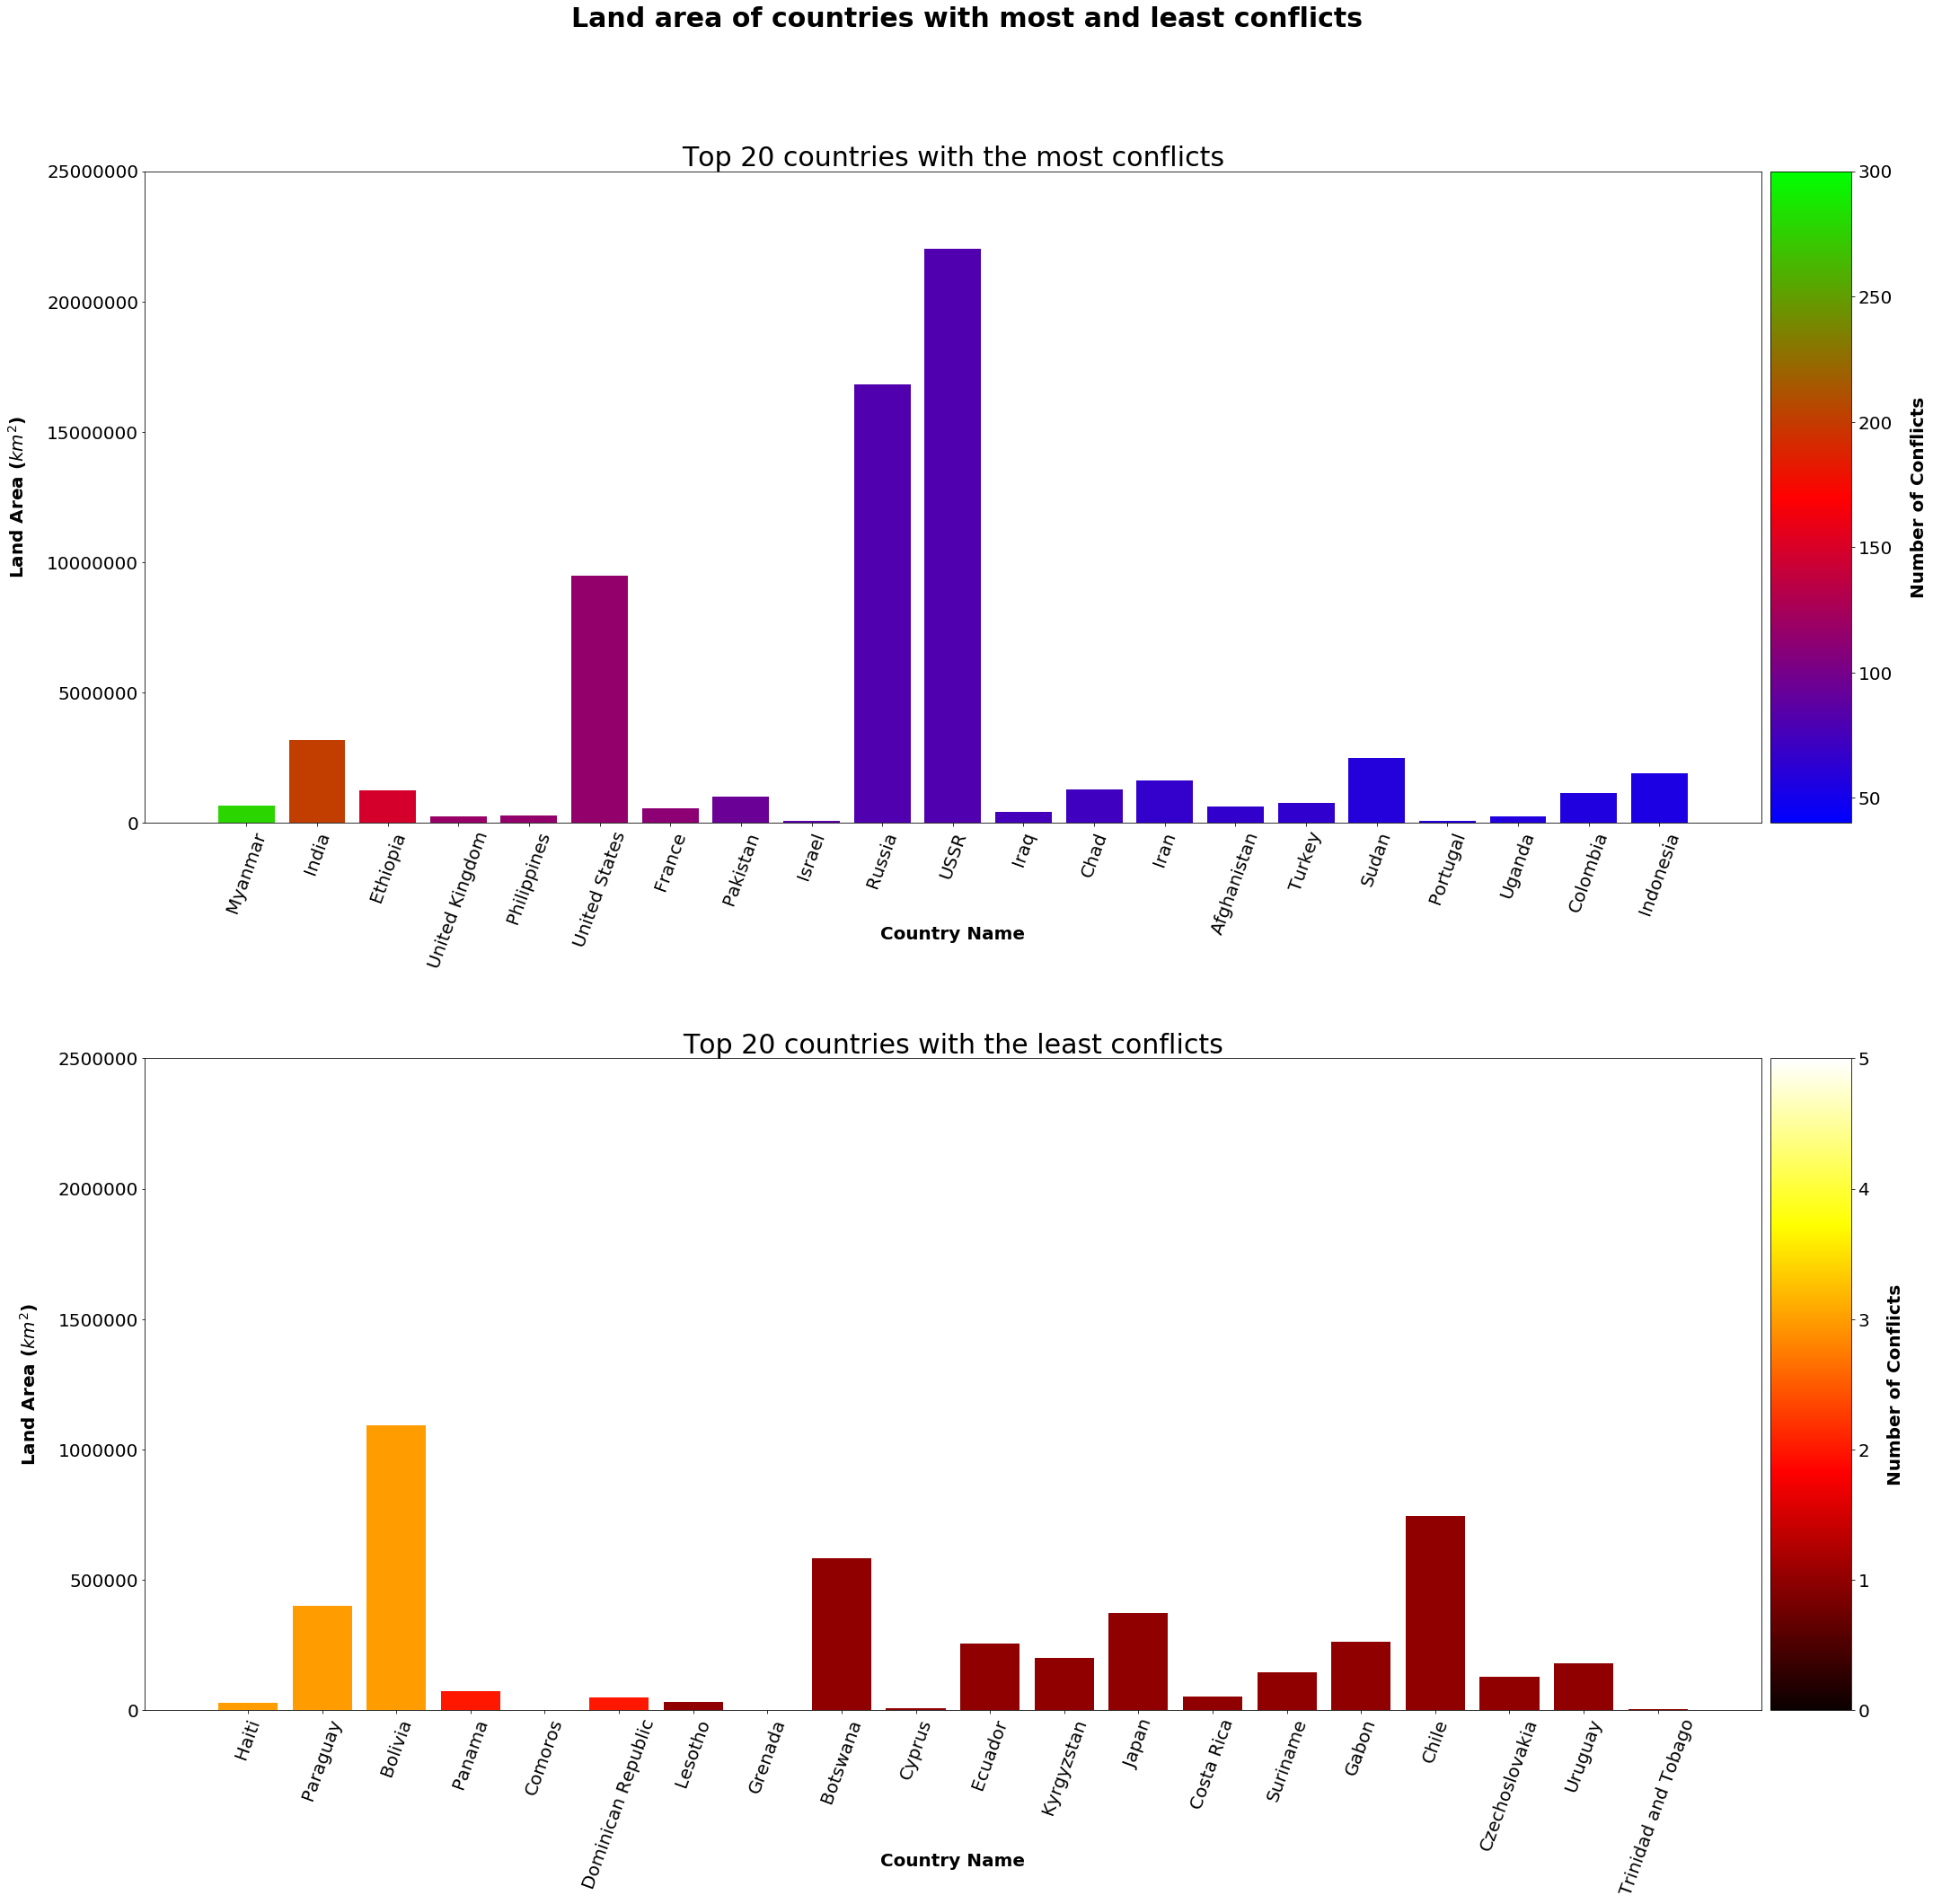

In [138]:
my_cmap = cm.get_cmap('brg')
my_cmap2 = cm.get_cmap('hot')
my_norm = Normalize(vmin=40, vmax=300)
my_norm2 = Normalize(vmin=0, vmax=5)

fig2 = plt.figure(figsize=(30,30))
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1]) 
ax1 = plt.subplot(gs[0])
ax1.bar(top_full['country_name'],top_full['area'], color=my_cmap(my_norm(top_full['number_of_conflicts'].to_list())))
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_title("Top 20 countries with the most conflicts", fontsize=30)
ax1.set_xlabel('Country Name', fontsize=20, labelpad=-50, fontweight='bold')
ax1.set_ylim([0,25000000])


ax2 = plt.subplot(gs[1])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=my_norm, orientation='vertical')
cb1.set_label('Number of Conflicts', fontsize=20, fontweight='bold', labelpad=20)

ax3 = plt.subplot(gs[2])
ax3.bar(bottom_full['country_name'],bottom_full['area'], color=my_cmap2(my_norm2(bottom_full['number_of_conflicts'].to_list())))
ax3.set_title("Top 20 countries with the least conflicts", fontsize=30)
ax3.ticklabel_format(axis="y", style="plain")
ax3.set_xlabel('Country Name', fontsize=20, labelpad=-50, fontweight='bold')
ax3.set_ylim([0,2500000])

ax4 = plt.subplot(gs[3])
cb2 = matplotlib.colorbar.ColorbarBase(ax4, cmap=my_cmap2, norm=my_norm2, orientation='vertical')
cb2.set_label('Number of Conflicts', fontsize=20, fontweight='bold', labelpad=20)

ax3.set_xlabel('Country Name', fontsize=20)
for ax in (ax1,ax3):
    ax.set_ylabel('Land Area ($km^2$)', fontsize=20, fontweight='bold', labelpad=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
for ax_cmap in (ax2,ax4):
    ax_cmap.xaxis.set_tick_params(labelsize=20)
    ax_cmap.yaxis.set_tick_params(labelsize=20)

for ax in fig2.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=70)

    
plt.suptitle("Land area of countries with most and least conflicts", fontsize=30, fontweight='bold')
plt.subplots_adjust(hspace=200)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(fname="fig.png")

The first important thing to note about these graphs is that the y-axis scale in the top20 chart is actually an order of magnitude greater than the bottom20 chart (max of 25,000,000 instead of 2,500,000). Setting the plots to the same scale ended up making the bottom 20 bars almost hidden due to the drastic difference in scale. As such, a limit was placed on the y axis in order to make sure the bars can for the most part show up. This does show that there is a correlation to land area and number of conflicts. The larger a country, the better the chance that they have been involved in a large amount of conflicts.

This then got us interested in what the middle portion looked like, so it was decided to plot the entire series of sorted number of conflicts and see if the expected trend held throughout the whole dataset. All 203 rows.

In [53]:
sorted_counts_full = sorted_conflict_counts.merge(cshapes, left_on="gw_id", right_on="gw_code")

In [54]:
sorted_counts_full.rename(columns={"conflict_id":"number_of_conflicts"},inplace=True)

In [91]:
sorted_counts_full

,number_of_conflicts,area,capital_lat,capital_long,capital_name,country_name,cow_code,cow_endday,cow_endmonth,cow_endyear,...,gw_endday,gw_endmonth,gw_endyear,gw_startday,gw_startmonth,gw_startyear,iso_alpha2,iso_alpha3,iso_name,iso_num
0,1,2.570267e+05,-0.216667,-78.50000,Quito,Ecuador,130,30,6,2016,...,30,6,2016,1,1,1946,EC,ECU,Ecuador,218
1,1,3.062143e+04,-29.300000,27.48333,Maseru,Lesotho,570,30,6,2016,...,30,6,2016,4,10,1966,LS,LSO,Lesotho,426
2,1,1.783572e+05,-34.900000,-56.20000,Montevideo,Uruguay,165,30,6,2016,...,30,6,2016,1,1,1946,UY,URY,Uruguay,858
3,1,1.275531e+05,50.083330,14.46667,Prague,Czechoslovakia,315,31,12,1992,...,31,12,1992,1,1,1946,CS,CSK,Czechoslovakia,200
4,1,7.458085e+05,-33.500000,-70.70000,Santiago,Chile,155,30,6,2016,...,30,6,2016,1,1,1946,CL,CHL,Chile,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,148,1.134773e+06,9.033333,38.70000,Addis Ababa,Ethiopia,530,30,6,2016,...,30,6,2016,24,5,1993,ET,ETH,Ethiopia,231
199,148,1.256379e+06,9.033333,38.70000,Addis Ababa,Ethiopia,530,22,5,1993,...,23,5,1993,1,1,1946,ET,ETH,Ethiopia,230
200,201,3.166803e+06,28.600000,77.20000,New Delhi,India,750,30,6,2016,...,30,6,2016,1,1,1949,IN,IND,India,356
201,201,3.060681e+06,28.600000,77.20000,New Delhi,India,750,31,12,1948,...,31,12,1948,15,8,1947,NaN,NaN,NaN,0


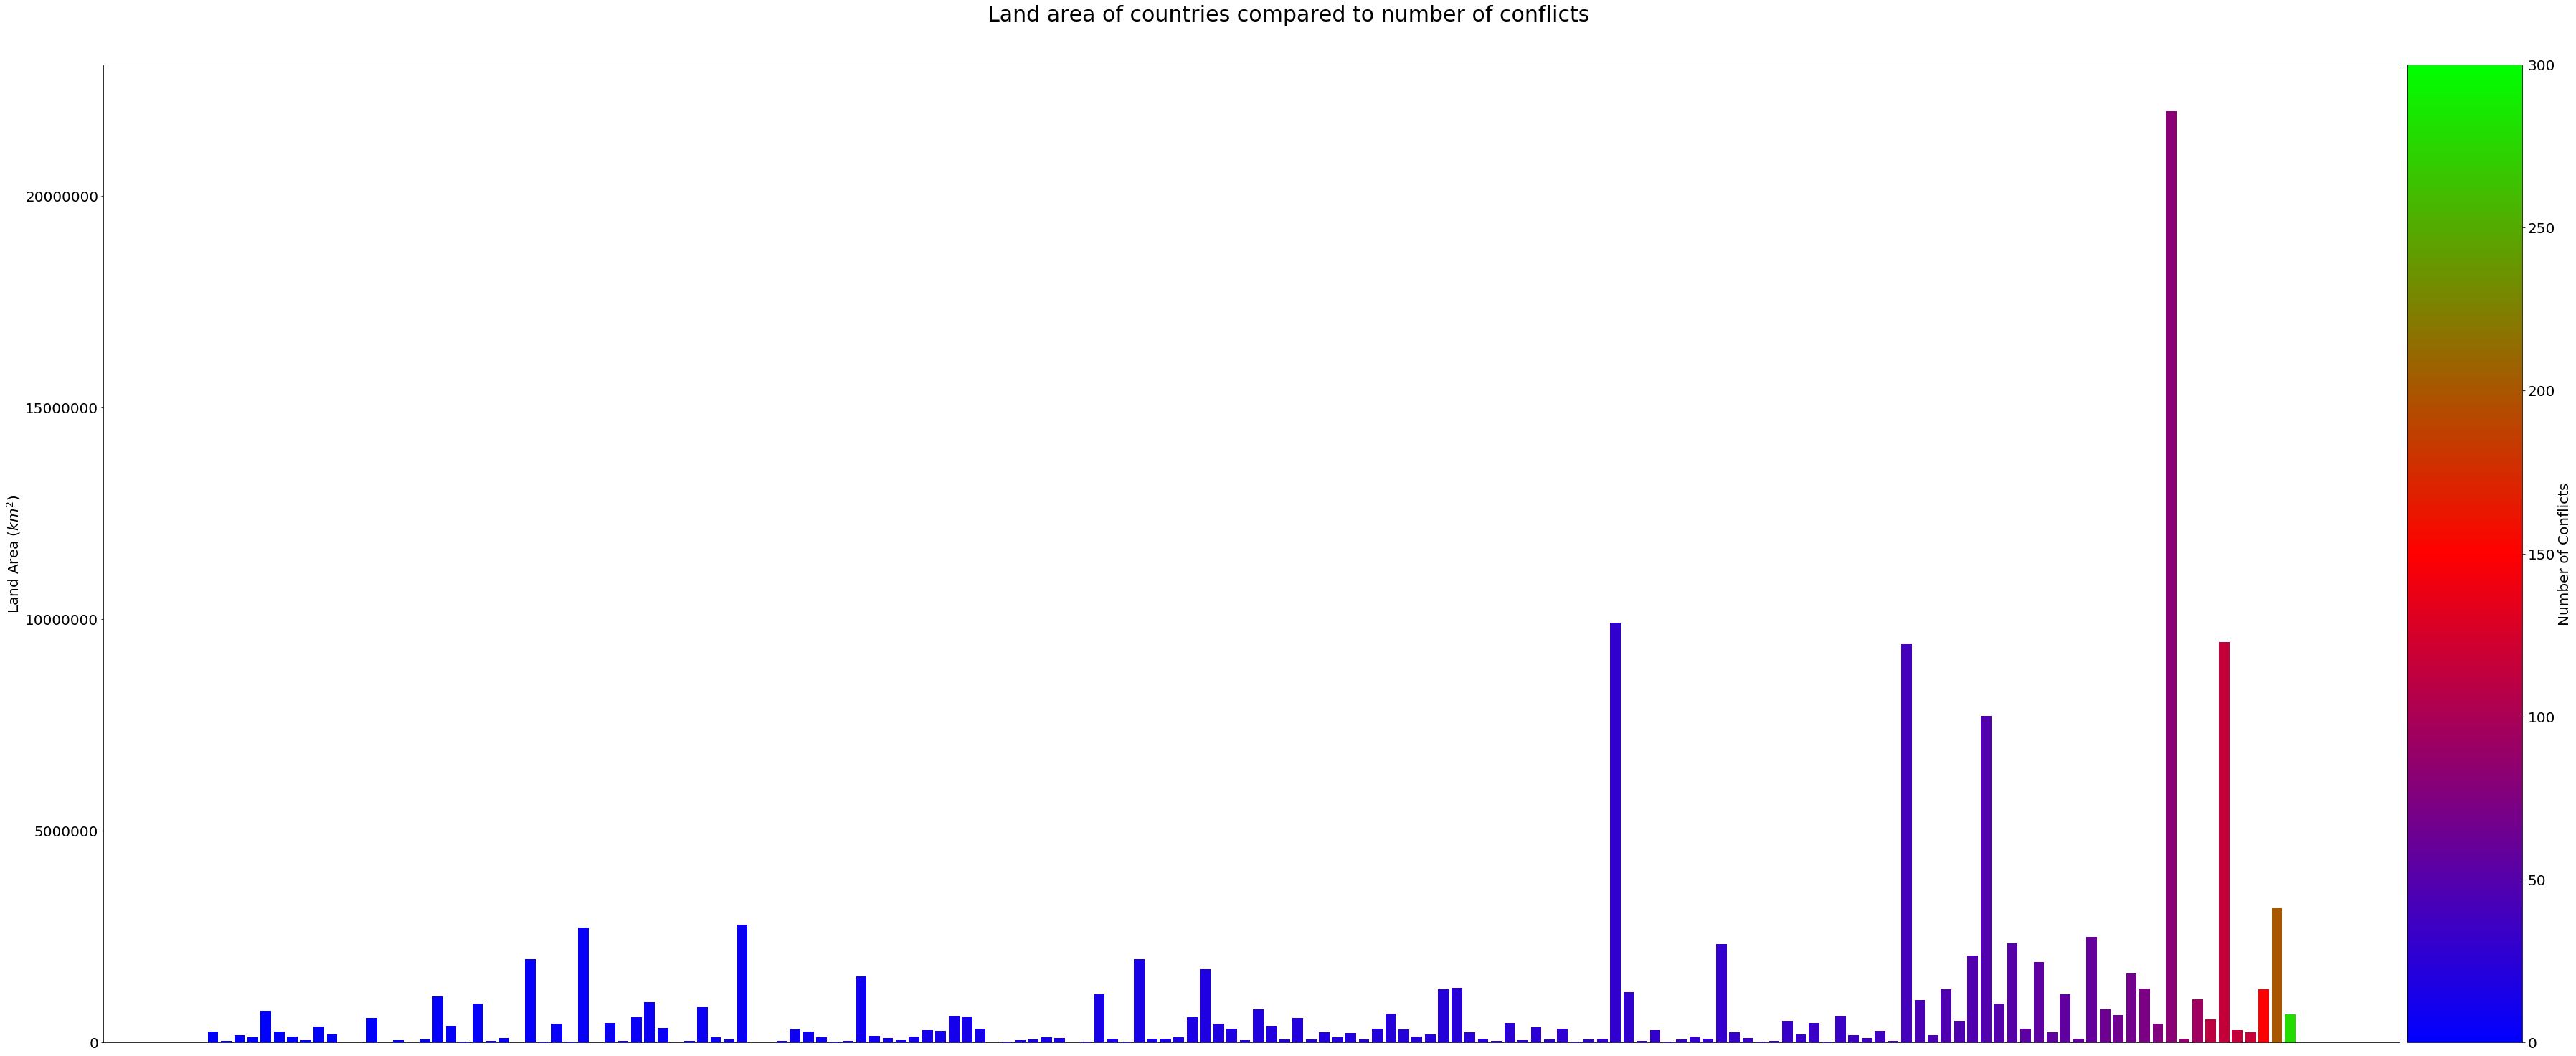

In [139]:
my_cmap3 = cm.get_cmap('brg')
my_norm3 = Normalize(vmin=0, vmax=300)


fig3 = plt.figure(figsize=(50,30))
gs2 = gridspec.GridSpec(1, 2, width_ratios=[20, 1]) 
nax1 = plt.subplot(gs2[0])
nax1.bar(sorted_counts_full['gw_code'].astype(str),sorted_counts_full['area'], color=my_cmap3(my_norm3(sorted_counts_full['number_of_conflicts'].to_list())))
nax1.ticklabel_format(axis="y", style="plain")
#nax1.set_xlabel('Country Name', fontsize=20)
nax1.set_xticks([])

nax2 = plt.subplot(gs2[1])
ncb = matplotlib.colorbar.ColorbarBase(nax2, cmap=my_cmap3, norm=my_norm3, orientation='vertical')
ncb.set_label('Number of Conflicts', fontsize=20)

nax1.set_ylabel('Land Area ($km^2$)', fontsize=20)
nax1.xaxis.set_tick_params(labelsize=20)
nax1.yaxis.set_tick_params(labelsize=20)
    
nax2.xaxis.set_tick_params(labelsize=20)
nax2.yaxis.set_tick_params(labelsize=20)

    
plt.suptitle("Land area of countries compared to number of conflicts", fontsize=30)

plt.tight_layout(rect=[0, 0.3, 1, 0.95])

plt.savefig(fname="fig2.png")

The x-axis is intentionally left unlabled due to the inability to display any tick labels due to the closeness of the datapoints. This graph is only intended to show the trend of number of conflicts to land area across the whole dataset. The countries represented by the bars are sorted in order of number of total conflicts which is represented by the colormap as well. This confirmed that the predicted trend of larger countries having been involved in conflicts that was predicted above does hold relatively true throughout the dataset.